In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [37]:
# Load the data into a dataframe

Mode = ["Aligned", "Aligned"]
# Mode = ["Rotated", "Rot30"]
# Mode = ["Shifted","Shifted"]

data = pd.read_csv(f"../Files/{Mode[0]}/EventInfo_merge_{Mode[1]}.csv", delimiter = ",", names = ["event", "x", "y", "z", "t"])

# Cut the first bin
data = data[data['t'] > 200]
display(data)

# Load the data into a dataframe
if (Mode[1] != "Rot30"):
    meta = pd.read_csv(f"../Files/{Mode[0]}/Metadata_merge_{Mode[1]}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z", "start E", "end E"])

else:
    meta = pd.read_csv(f"../Files/{Mode[0]}/Metadata_merge_{Mode[1]}.csv", delimiter = ",", names = ["event","electrons","ions","elastic","ionisations","attachment","inelastic","excitation","top","bottom","start x","start y","start z"])
 
display(meta)


event      x      y      z         t
0            21  0.380  0.157  0.508   977.183
1            21  0.383  0.159  0.506   987.762
2            21  0.384  0.160  0.501  1008.720
3            21  0.384  0.161  0.500  1011.580
4            21  0.385  0.162  0.494  1044.230
...         ...    ...    ...    ...       ...
45311296  20000 -0.220 -0.285 -0.495  4402.540
45311297  20000 -0.220 -0.286 -0.495  4403.150
45311298  20000 -0.218 -0.289 -0.496  4408.980
45311299  20000 -0.218 -0.289 -0.495  4411.260
45311300  20000 -0.218 -0.290 -0.496  4412.110

[45309305 rows x 5 columns]

event  electrons  ions    elastic  ionisations  attachment  inelastic  \
0         21          1     0  344304075            0           0          0   
1         22          1     0  323321781            0           0          0   
2         23          1     0  375667820            0           0          0   
3         24          1     0  367535837            0           0          0   
4         25          1     0  364012405            0           0          0   
...      ...        ...   ...        ...          ...         ...        ...   
39935  19996          1     0  360859517            0           0          0   
39936  19997          1     0  359187072            0           0          0   
39937  19998          1     0  378439837            0           0          0   
39938  19999          1     0  353073164            0           0          0   
39939  20000          1     0  326139173            0           0          0   

       excitation  top  bottom   start x   start y  start z   start E  \
0            1135    0       1  0.410589  0.157936     0.65  1.000000   
1            1212    0       1 -0.157715  0.224725     0.65  8.707961   
2            1103    0       1  0.284188  0.305848     0.65  2.996660   
3            1132    0       1  0.367905 -0.029396     0.65  3.486425   
4            1098    0       1  0.357818 -0.239819     0.65  7.016737   
...           ...  ...     ...       ...       ...      ...       ...   
39935        1107    0       1  0.109435 -0.416635     0.65  4.532657   
39936        1115    0       1  0.189803 -0.228414     0.65  2.863514   
39937        1098    0       1 -0.196005  0.274152     0.65  4.343618   
39938        1138    0       1 -0.077307 -0.351011     0.65  3.988393   
39939        1207    0       1 -0.103632 -0.333988     0.65  3.153017   

          end E  
0      6.429476  
1      8.201021  
2      1.816021  
3      1.955001  
4      4.673224  
...         ...  
39935  5.314994  
39936  6.265978  
39937  2.706919  
39938  4.348854  
39939  7.769379  

[39940 rows x 15 columns]

In [38]:
# Print some additional info
print("ions: ", meta['ions'].sum())
print("Ionisations: ", meta['ionisations'].sum())
print("attachment: ", meta['attachment'].sum())
print("inelastic: ", meta['inelastic'].sum())
print("top: ", meta['top'].sum())
print("bottom: ", meta['bottom'].sum())
print("Mean VuV: ", meta['excitation'].mean())
print("STD/Mean VuV: ", 100*meta['excitation'].std()/meta['excitation'].mean())


ions:  0
Ionisations:  0
attachment:  0
inelastic:  0
top:  0
bottom:  39940
Mean VuV:  1134.4842513770657
STD/Mean VuV:  3.842426886801796


In [39]:
# Bin the scatters in time
tmin=0
tmax=6000
tbw=200

tot_tracks = (len(data['event'].unique()))

tbins = np.arange(tmin, tmax+tbw, tbw)
tbins_centre = np.arange(tmin+tbw/2, tmax+tbw/2, tbw)


data['t'] = pd.cut(x=data['t'], bins=tbins,labels=tbins_centre, include_lowest=True)
display(data)

# Now average over the events
avg = data.groupby(['t']).count()
avg = avg.fillna(0)
avg.reset_index(inplace=True) 
display(avg)

std = data.groupby(['t']).std()
std = std.fillna(0)
std.reset_index(inplace=True) 
display(std)


event      x      y      z       t
0            21  0.380  0.157  0.508   900.0
1            21  0.383  0.159  0.506   900.0
2            21  0.384  0.160  0.501  1100.0
3            21  0.384  0.161  0.500  1100.0
4            21  0.385  0.162  0.494  1100.0
...         ...    ...    ...    ...     ...
45311296  20000 -0.220 -0.285 -0.495  4500.0
45311297  20000 -0.220 -0.286 -0.495  4500.0
45311298  20000 -0.218 -0.289 -0.496  4500.0
45311299  20000 -0.218 -0.289 -0.495  4500.0
45311300  20000 -0.218 -0.290 -0.496  4500.0

[45309305 rows x 5 columns]

t    event        x        y        z
0    100.0        0        0        0        0
1    300.0        0        0        0        0
2    500.0        0        0        0        0
3    700.0        2        2        2        2
4    900.0     6996     6996     6996     6996
5   1100.0   251058   251058   251058   251058
6   1300.0  1286182  1286182  1286182  1286182
7   1500.0  2424077  2424077  2424077  2424077
8   1700.0  2927381  2927381  2927381  2927381
9   1900.0  3054689  3054689  3054689  3054689
10  2100.0  3077638  3077638  3077638  3077638
11  2300.0  3072493  3072493  3072493  3072493
12  2500.0  3071108  3071108  3071108  3071108
13  2700.0  3074585  3074585  3074585  3074585
14  2900.0  3070896  3070896  3070896  3070896
15  3100.0  3073479  3073479  3073479  3073479
16  3300.0  3075354  3075354  3075354  3075354
17  3500.0  3076562  3076562  3076562  3076562
18  3700.0  3063386  3063386  3063386  3063386
19  3900.0  2952742  2952742  2952742  2952742
20  4100.0  2499937  2499937  2499937  2499937
21  4300.0  1549174  1549174  1549174  1549174
22  4500.0   553049   553049   553049   553049
23  4700.0   117642   117642   117642   117642
24  4900.0    23586    23586    23586    23586
25  5100.0     5113     5113     5113     5113
26  5300.0     1410     1410     1410     1410
27  5500.0      498      498      498      498
28  5700.0      205      205      205      205
29  5900.0       53       53       53       53

t         event         x         y         z
0    100.0      0.000000  0.000000  0.000000  0.000000
1    300.0      0.000000  0.000000  0.000000  0.000000
2    500.0      0.000000  0.000000  0.000000  0.000000
3    700.0  14708.528155  0.430628  0.073539  0.001414
4    900.0  11452.290230  0.229847  0.228600  0.008678
5   1100.0  11572.435253  0.232118  0.230928  0.015044
6   1300.0  11566.699508  0.232561  0.231995  0.023363
7   1500.0  11559.913832  0.233446  0.233220  0.031297
8   1700.0  11555.614110  0.233671  0.233817  0.036612
9   1900.0  11555.670422  0.233798  0.233987  0.038911
10  2100.0  11555.193009  0.233780  0.234201  0.039669
11  2300.0  11550.631443  0.234115  0.234319  0.039963
12  2500.0  11551.595865  0.234122  0.234521  0.040132
13  2700.0  11548.829319  0.234272  0.234478  0.040115
14  2900.0  11551.742170  0.234411  0.234723  0.040170
15  3100.0  11551.360742  0.234408  0.234793  0.040662
16  3300.0  11553.690632  0.234583  0.234787  0.040885
17  3500.0  11550.607372  0.234571  0.234924  0.041072
18  3700.0  11553.977103  0.234787  0.234943  0.041089
19  3900.0  11557.138190  0.234879  0.235162  0.040615
20  4100.0  11551.285999  0.234717  0.235477  0.039098
21  4300.0  11523.909550  0.233582  0.235411  0.035277
22  4500.0  11541.833474  0.232165  0.233786  0.027530
23  4700.0  11574.984531  0.233132  0.235581  0.019277
24  4900.0  11396.615423  0.235974  0.235740  0.010324
25  5100.0  11521.722618  0.234282  0.246275  0.004074
26  5300.0  11865.068504  0.253287  0.236347  0.002685
27  5500.0  11343.029007  0.241176  0.253559  0.002323
28  5700.0  10310.122381  0.242567  0.257082  0.002414
29  5900.0  11946.338863  0.279639  0.224734  0.002072

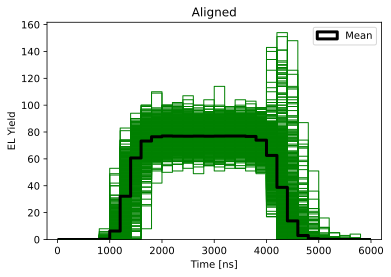

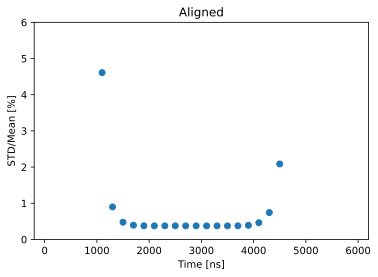

In [40]:
# Make a plot of the timing profile of the EL emission
plt.figure()

# New dataframe for storing binned hist details
data_binned = pd.DataFrame()

count = 0

for i in data['event'].unique():
    if (count > 1000): break

    # Plot the data
    counts, bins, bars  = plt.hist(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "green")
    # counts, edges  = np.histogram(data[data["event"] == i]['t'], bins = np.arange(tmin, tmax+tbw, tbw))
    
    # Save binned info to a histogram
    temp_df =  pd.DataFrame({'event': np.ones(len(counts))*i,
                   'Yield': counts,
                   'Time': tbins_centre })
    
    data_binned = pd.concat([data_binned,temp_df])
    count+=1

plt.hist(avg['t'], weights = avg['event']/tot_tracks,bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean")
plt.xlim(-200, 6200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
plt.title(Mode[1])
plt.legend()
plt.savefig("../Plots/"+Mode[1]+"/Yield_vs_Time.pdf")
# plt.title(f"Total VUV:{nVuV}")

plt.figure()
plt.scatter(avg['t'], 100*std['event']/avg['event'])
plt.xlabel("Time [ns]")
plt.ylabel("STD/Mean [%]")
plt.title(Mode[1])
plt.xlim(-200, 6200)
plt.ylim(0, 6 )
plt.savefig("../Plots/"+Mode[1]+"/Fluctuations_vs_Time.pdf")


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 4.4950e+03,
        2.9998e+04, 3.9022e+04, 3.9904e+04, 3.9940e+04, 3.9940e+04,
        3.9940e+04, 3.9940e+04, 3.9940e+04, 3.9940e+04, 3.9940e+04,
        3.9940e+04, 3.9940e+04, 3.9940e+04, 3.9940e+04, 3.9940e+04,
        3.9940e+04, 3.9507e+04, 2.7118e+04, 9.9910e+03, 3.9580e+03,
        1.7490e+03, 7.9400e+02, 3.4000e+02, 1.4700e+02, 4.1000e+01]),
 array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200,
        4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000]),
 [<matplotlib.patches.Polygon at 0x13a6d1ab0>])

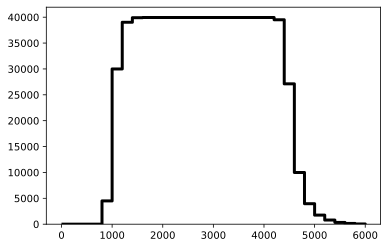

In [41]:
# Make a plot of the summed EL Yield over time
summed = data[['event', 't']]
summed = summed.drop_duplicates().groupby('t').count()
summed.reset_index(inplace=True) 
plt.figure()
plt.hist(summed['t'], weights = summed['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3)
# display(test)

Empty DataFrame
Columns: [event, Yield, Time]
Index: []

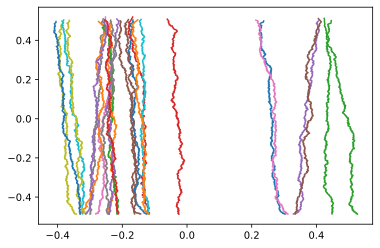

In [42]:
display(data_binned[data_binned['Yield'] > 160])
evt_highY = data_binned[data_binned['Yield'] > 120]['event'].unique()

fig = plt.figure()
ax = fig.add_subplot()

for i in evt_highY:
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])



In [43]:
# Make a plot of the timing profile of the EL emission
fig = plt.figure()
ax = fig.add_subplot()

count = 0
for i in data['event'].unique():
    if (count > 100): break
    ax.plot(data[data["event"] == i]['y'], data[data["event"] == i]['z'])
    count+=1

# ax.set_zlim(-0.8, 0.7)
# ax.set_xlim(-0.7, 0.7)
# ax.set_ylim(-0.7, 0.7)
# ax.invert_xaxis()

ax.set_xlabel("y [cm]")
ax.set_ylabel("z [cm]")
# ax.set_zlabel("z [cm]")


Text(0, 0.5, 'z [cm]')

0.13135 0.22750487357417204 0.2627
0.410589 0.157936 0.5253999999999996 0.1952571274422522 53.984859050399635 0.12450289992533091


excitation   start x   start y  corr   ms   ns
95          1096 -0.122946  0.209914     1  1.0 -0.0
293         1092  0.122984  0.220783     1  1.0 -1.0
302         1095 -0.101417  0.203194     1 -2.0 -0.0
488         1129  0.004286  0.218459     1 -1.0  2.0
626         1200 -0.000096  0.211954     1 -1.0 -1.0
1132        1113 -0.014002  0.201264     1 -1.0  2.0
1217        1132  0.130907  0.206550     1  1.0 -1.0
1232        1089 -0.105762  0.202460     1  1.0 -0.0
1280        1110  0.003620  0.213137     1 -1.0  2.0
1688        1239 -0.007020  0.209041     1 -1.0 -1.0
1702        1088  0.005948  0.208181     1 -1.0  2.0
1906        1120  0.001720  0.216272     1 -1.0 -1.0
1917        1087 -0.000108  0.209567     1 -1.0 -1.0
3420        1097 -0.118788  0.210613     1  1.0 -0.0
3536        1172 -0.103677  0.206424     1 -2.0 -0.0
3721        1102 -0.005281  0.213537     1 -1.0  2.0
4315        1157  0.117686  0.216519     1  1.0 -1.0
4409        1136 -0.000835  0.209449     1 -1.0  2.0
4478        1115 -0.006011  0.200511     1 -1.0 -1.0
4552        1098  0.126912  0.204590     1  1.0 -1.0
4618        1104  0.123273  0.219876     1  1.0 -1.0
4822        1221 -0.009252  0.203318     1 -1.0  2.0
5159        1185  0.093151  0.202431     1  1.0 -1.0
5190        1108  0.006280  0.200236     1 -1.0 -1.0
5860        1118 -0.110533  0.215126     1 -2.0 -0.0
5991        1103  0.006397  0.202932     1 -1.0  2.0
5999        1077  0.102059  0.203999     1  1.0 -1.0
6014        1106 -0.118613  0.206168     1  1.0 -0.0
6193        1120 -0.003000  0.219256     1 -1.0 -1.0
6212        1180  0.000376  0.213284     1 -1.0 -1.0

1134.4842513770657


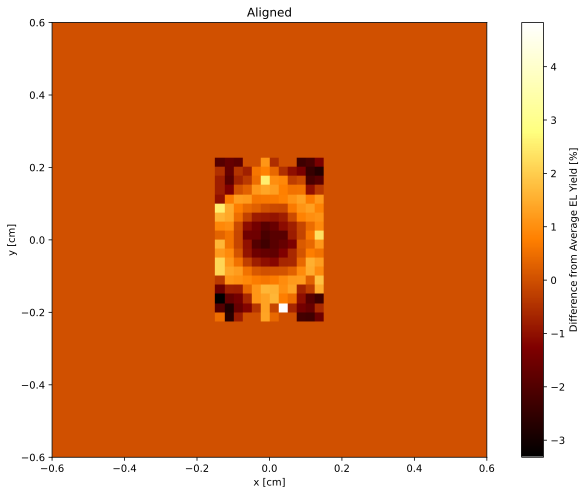

start x start y   excitation  corr        ms        ns
879  -0.1375 -0.2125  1140.000000   1.0 -1.000000  1.000000
880  -0.1375 -0.1875  1112.333333   1.0 -1.000000  1.000000
881  -0.1375 -0.1625  1096.818182   1.0 -1.000000  1.000000
882  -0.1375 -0.1375  1116.428571   1.0 -1.000000  1.000000
883  -0.1375 -0.1125  1130.695652   1.0  0.043478  0.565217
...      ...     ...          ...   ...       ...       ...
1420  0.1375  0.1125  1147.375000   1.0  0.250000 -0.833333
1421  0.1375  0.1375  1130.363636   1.0  1.000000 -1.000000
1422  0.1375  0.1625  1113.000000   1.0  1.000000 -1.000000
1423  0.1375  0.1875  1103.600000   1.0  1.000000 -1.000000
1424  0.1375  0.2125  1119.200000   1.0  1.000000 -1.000000

[208 rows x 6 columns]

start x start y   excitation      corr        ms        ns       pct
884  -0.1375 -0.0875  1158.783784  1.000000  0.054054  0.621622  2.141901
885  -0.1375 -0.0625  1158.590000  1.000000  0.360000  0.450000  2.124820
887  -0.1375 -0.0125  1152.784314  0.862745 -0.009804  0.529412  1.613073
890  -0.1375  0.0625  1152.628866  1.000000 -0.288660  0.587629  1.599371
891  -0.1375  0.0875  1163.217391  1.000000 -0.369565  0.673913  2.532705
1122 -0.0125 -0.1375  1153.084795  1.000000  0.736842 -0.409357  1.639559
1134 -0.0125  0.1625  1162.934959  1.000000 -0.943089  0.439024  2.507810
1169  0.0125 -0.1625  1152.812500  1.000000  0.921875 -0.335938  1.615558
1170  0.0125 -0.1375  1152.181818  1.000000  0.715152 -0.290909  1.559966
1216  0.0375 -0.1875  1189.250000  1.000000  1.250000  0.000000  4.827370
1365  0.1125 -0.0625  1151.885117  0.994778  0.375979 -0.624021  1.533813
1411  0.1375 -0.1125  1155.100000  1.000000 -0.400000 -0.400000  1.817191
1416  0.1375  0.0125  1160.365854  0.878049  0.085366 -0.560976  2.281354

start x start y   excitation      corr        ms        ns       pct
880  -0.1375 -0.1875  1112.333333  1.000000 -1.000000  1.000000 -1.952510
881  -0.1375 -0.1625  1096.818182  1.000000 -1.000000  1.000000 -3.320105
882  -0.1375 -0.1375  1116.428571  1.000000 -1.000000  1.000000 -1.591532
896  -0.1375  0.2125  1112.666667  1.000000  1.000000  0.000000 -1.923128
927  -0.1125 -0.2125  1103.875000  1.000000  0.500000 -0.500000 -2.698076
928  -0.1125 -0.1875  1102.500000  1.000000 -1.000000  1.000000 -2.819277
929  -0.1125 -0.1625  1114.972222  1.000000 -1.000000  1.000000 -1.719903
942  -0.1125  0.1625  1113.173913  1.000000  1.000000  0.000000 -1.878416
943  -0.1125  0.1875  1115.058824  1.000000  0.735294  0.000000 -1.712270
944  -0.1125  0.2125  1115.333333  1.000000 -0.285714  0.000000 -1.688073
976  -0.0875 -0.1875  1115.608696  1.000000  0.391304 -0.391304 -1.663801
992  -0.0875  0.2125  1114.000000  1.000000 -0.090909  0.000000 -1.805600
1032 -0.0625  0.0125  1117.040541  0.713514 -0.132432  0.440541 -1.537590
1078 -0.0375 -0.0375  1116.955782  0.659864  0.074830  0.115646 -1.545061
1079 -0.0375 -0.0125  1112.169761  0.660477  0.135279  0.270557 -1.966928
1080 -0.0375  0.0125  1116.991354  0.720461 -0.207493  0.487032 -1.541925
1126 -0.0125 -0.0375  1114.921127  0.673239  0.312676 -0.076056 -1.724407
1127 -0.0125 -0.0125  1108.441718  0.641104  0.116564  0.085890 -2.295539
1128 -0.0125  0.0125  1110.428115  0.638978 -0.115016  0.220447 -2.120447
1129 -0.0125  0.0375  1112.954268  0.676829 -0.189024  0.088415 -1.897777
1174  0.0125 -0.0375  1114.212389  0.678466  0.147493 -0.097345 -1.786879
1175  0.0125 -0.0125  1112.714697  0.605187  0.103746 -0.172911 -1.918894
1176  0.0125  0.0125  1112.867470  0.584337 -0.144578 -0.105422 -1.905428
1177  0.0125  0.0375  1115.743202  0.634441 -0.157100  0.015106 -1.651944
1223  0.0375 -0.0125  1115.474164  0.696049  0.142857 -0.349544 -1.675659
1224  0.0375  0.0125  1112.706494  0.657143 -0.038961 -0.259740 -1.919617
1311  0.0875 -0.2125  1109.222222  1.000000  0.333333  0.000000 -2.226741
1328  0.0875  0.2125  1108.300000  1.000000  0.100000 -0.100000 -2.308031
1359  0.1125 -0.2125  1108.617021  1.000000  0.148936  0.000000 -2.280087
1360  0.1125 -0.1875  1115.433333  1.000000 -0.700000  0.000000 -1.679258
1361  0.1125 -0.1625  1112.482759  1.000000 -1.000000  0.000000 -1.939339
1374  0.1125  0.1625  1109.836735  1.000000  1.000000 -1.000000 -2.172575
1375  0.1125  0.1875  1106.697674  1.000000  0.790698 -0.790698 -2.449270
1376  0.1125  0.2125  1110.431818  1.000000  0.113636 -0.113636 -2.120121
1407  0.1375 -0.2125  1116.625000  1.000000 -1.000000  0.000000 -1.574218
1409  0.1375 -0.1625  1108.142857  1.000000 -1.000000  0.000000 -2.321883
1422  0.1375  0.1625  1113.000000  1.000000  1.000000 -1.000000 -1.893746
1423  0.1375  0.1875  1103.600000  1.000000  1.000000 -1.000000 -2.722316

In [262]:
req_par = ['excitation', 'start x', 'start y']
meta_slim = meta[req_par]
pd.options.mode.chained_assignment = None  # default='warn'

# Define the bins in x and y
bmin=-0.6
bmax=0.6
bw=0.025

bins = np.arange(bmin, bmax+bw, bw)
bins_centre = np.arange(bmin+bw/2, bmax+bw/2, bw)

# Use symmetry to condense the cells
a1 = 0.25+0.0127
b1 = 0.125+0.0127/2
b2 = (0.25+0.0127)*(np.cos(30*np.pi/180))
b = np.sqrt(b1*b1 + b2*b2)
print(b1,b2,b)

h = 0.0127*(np.cos(30*np.pi/180))+0.125 # height from centre up to middle of tip of hex

# Vector of centres of hexagons lying in x-plane
hex_x_centres = np.arange(-5*a1, 5*a1, a1)

correction = []
centres = []
dmaxs = []
rs = []
count = 0
for x,y in zip(meta_slim["start x"], meta_slim["start y"]):
    
    count = count +1

    Filled = False

    cmin = 0
    diff = 1e8
    for c in hex_x_centres:
        
        if ( abs(c - x) <= diff):
            cmin = c
            diff = abs(c - x)

    r = np.sqrt( (-x+cmin)*(-x+cmin) + y*y )
    theta = np.arccos((cmin-x)/r)
    
    if (theta*180/np.pi > 60):
        theta = theta - int((theta*180/np.pi)/60)*60*np.pi/180
    
    dmax = (np.sqrt(3)*a1*0.5) / (np.sqrt(3)*np.cos(theta) + np.sin(theta))

    if (count == 1):
        print(x,y,cmin,r,theta*180/np.pi, dmax)
    
    if (r <= dmax):
        Filled = True
        correction.append(0)
        centres.append(cmin)
        dmaxs.append(dmax)
        rs.append(r)
    
    if (Filled == False):
        correction.append(1)
        centres.append(1)
        dmaxs.append(1)
        rs.append(-1)
    

meta_slim['corr'] = correction
# meta_slim['cent'] = centres
# meta_slim['dmax'] = dmaxs
# meta_slim['r'] = rs

meta_slim["start x"] = pd.to_numeric(meta_slim["start x"])
meta_slim["start y"] = pd.to_numeric(meta_slim["start y"])

# project vector of point onto basis b. 
meta_slim["ms"] = round(((b1* abs(meta_slim["start x"]) + b2*abs(meta_slim["start y"]))/b)/b)*meta_slim['corr']

# For negative values of y, we need to go in the other direction of the vector b, so flip the sign
meta_slim["ms"] = np.where(meta_slim["start y"] < 0, meta_slim["ms"]*-1, meta_slim["ms"])

# display(meta_slim.head(20))
meta_slim["start x"] = meta_slim["start x"] - meta_slim["ms"]*b1
meta_slim["start y"] = meta_slim["start y"] - meta_slim["ms"]*b2


# meta_slim["ns"] = round(meta_slim["start x"]/a1)
# meta_slim[ "start x"] = meta_slim[ "start x"] - ( meta_slim[ "ns"]*a1)

display(meta_slim[meta_slim["start y"] > 0.2].head(30))

# Now bin the data
meta_slim['start x'] = pd.cut(x=meta_slim['start x'], bins=bins,labels=bins_centre, include_lowest=True)
meta_slim['start y'] = pd.cut(x=meta_slim['start y'], bins=bins,labels=bins_centre, include_lowest=True)


# Now average over the events
meta_avg_ = meta_slim.groupby(['start x', 'start y']).mean()
meta_avg_ = meta_avg_.fillna(0)
meta_avg_.reset_index(inplace=True) 

# Kill all the rows that are empty
meta_avg = meta_avg_[meta_avg_['excitation'] != 0]

print(meta_slim['excitation'].mean())
avg_VuV = meta_slim['excitation'].mean()

fig, ax = plt.subplots(figsize =(10, 7))
# Creating plot
# ax.scatter(meta_avg["start x"], meta_avg["start y"], c=meta_avg["excitation"])


h, _, _ = np.histogram2d(meta_avg["start x"], meta_avg["start y"], weights=100*(meta_avg["excitation"] - avg_VuV)/avg_VuV, bins=[bins, bins])
# h, _, _ = np.histogram2d(meta_avg["x shift"], meta_avg["y shift"], weights=100*(meta_avg["excitation"] - avg_VuV)/avg_VuV, bins=[bins, bins])
im = ax.imshow(np.flip(h.T, axis=0), extent=[bins[0], bins[-1], bins[0], bins[-1]], cmap="afmhot") #, vmin=-1.5)
cbar = plt.colorbar(im, ax=ax)
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
cbar.set_label("Difference from Average EL Yield [%]")
plt.title(Mode[1])
  
# show plot
plt.tight_layout() 
plt.savefig("../Plots/"+Mode[1]+"/Yield_vs_XYpos.pdf")
plt.show()

display(meta_avg)

# Get the start x and start y positions of events which are greater than 
# or less than some percentage of the mean
meta_avg['pct'] = 100*(meta_avg["excitation"] - avg_VuV)/avg_VuV
start_gt = meta_avg[meta_avg['pct'] > 1.5]
start_lt = meta_avg[meta_avg['pct'] < -1.5]

display(start_gt)
display(start_lt)

Calculating value:  0.05
Calculating value:  0.1
Calculating value:  0.15000000000000002
Calculating value:  0.2


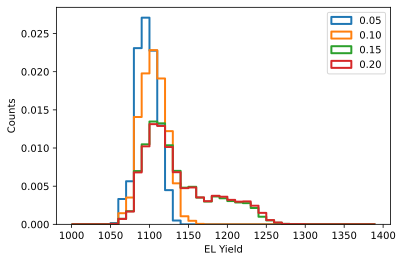

In [48]:
# Make a side by side plot of the binned energy and the radial cut

plt.figure()

# Plot the total EL yield for each configuration

# Apply a radial cut
range_ = np.arange(0.05, 0.25, 0.05)
for c in range_:
    print("Calculating value: ", c)
    cutval = c
    rad_cut = data[ np.sqrt(data['x']*data['x'] + data['y']*data['y']) >= cutval]['event'].unique()
    filtered_data = data[~data.event.isin(rad_cut)]

    data_align_tot = filtered_data.pivot_table(columns=['event'], aggfunc='size').reset_index()
    data_align_tot.columns = ['event', 'Yield']
    plt.hist(data_align_tot['Yield'], bins = np.arange(1000, 1400, 10), histtype="step",density = True, linewidth=2, label='{0:.2f}'.format(c) )

plt.xlabel("EL Yield")
plt.ylabel("Counts")
plt.legend(loc = 'upper right')
plt.savefig("../Plots/"+Mode[1]+"/YieldTotal.pdf")

In [46]:
# Merge dataframe to get start position in the data table
data_meta = data.merge( , on="event", how = 'inner')

# Now bin the data
data_meta['start x'] = pd.cut(x=data_meta['start x'], bins=bins,labels=bins_centre, include_lowest=True)
data_meta['start y'] = pd.cut(x=data_meta['start y'], bins=bins,labels=bins_centre, include_lowest=True)

data_meta = data_meta.drop(columns=["excitation", "electrons", "ions", "elastic", "ionisations", "attachment", "inelastic","top", "bottom", "start z", "start E", "end E"])


# Get all events with energy resolution greater/less than mean by some percentage
data_meta_gt = pd.merge(start_gt.reset_index(), data_meta, how='inner').set_index('index')
data_meta_lt = pd.merge(start_lt.reset_index(), data_meta, how='inner').set_index('index')


# Average over the time bins to get the average waveform in each mode
avg_gt = data_meta_gt.groupby(['t']).count()
avg_gt = avg_gt.fillna(0)
avg_gt.reset_index(inplace=True) 

avg_lt = data_meta_lt.groupby(['t']).count()
avg_lt = avg_lt.fillna(0)
avg_lt.reset_index(inplace=True) 


display(data_meta_gt)



SyntaxError: invalid syntax (496559210.py, line 2)

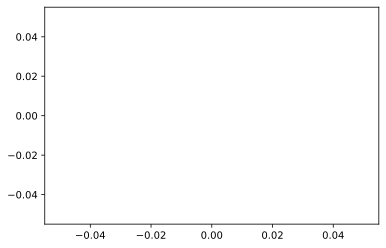

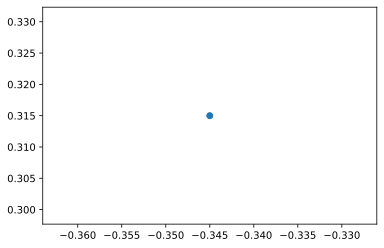

In [ ]:
# Make a plot of the start x and start y which have a yield greater and less than the average
plt.figure()

start_gt = data_meta_gt.drop(columns = ["excitation", "pct", "event", "x", "y", "z","t"])
start_gt = start_gt.drop_duplicates()

plt.scatter(start_gt["start x"], start_gt["start y"])

plt.figure()

start_lt = data_meta_lt.drop(columns = ["excitation", "pct", "event", "x", "y", "z","t"])
start_lt = start_lt.drop_duplicates()

plt.scatter(start_lt["start x"], start_lt["start y"])

/Users/mistryk2/opt/anaconda3/envs/local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'EL Yield')

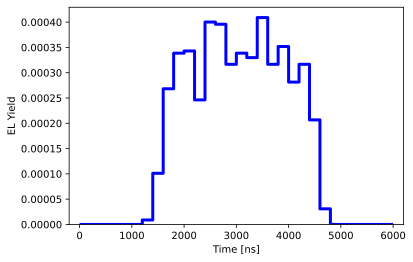

In [ ]:
plt.figure()
plt.hist(avg_gt['t'], weights = avg_gt['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "black", linewidth=3, label="Mean", density = True)
avg_lt['t_'] = avg_lt['t'].astype('float')
avg_lt['t_'] = avg_lt['t_']+200
plt.hist(avg_lt['t_'], weights = avg_lt['event'],bins = np.arange(tmin, tmax+tbw, tbw), histtype="step", color = "blue", linewidth=3, label="Mean", density = True)
plt.xlim(-200, 6200)

plt.xlabel("Time [ns]")
plt.ylabel("EL Yield")
